In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

(67, 765)
[ 48  88 118 187 294 388 468 507 575 615 719]
[  1.07966332e-03   6.43817251e-02   6.29446960e+03]

48 6266.49 6300.04747111
33.5574711097

88 6304.79 6308.49610859
3.7061085858

118 6334.43 6317.09987967
-17.3301203304

187 6382.99 6344.26373332
-38.7262666834

294 6402.25 6406.71961011
4.46961010561

388 6506.53 6481.98654853
-24.543451475

468 6532.88 6561.07243084
28.1924308382

507 6598.95 6604.63751594
5.68751594432

575 6678.28 6688.45278185
10.1727818466

615 6717.04 6742.42002499
25.3800249883

719 6929.47 6898.90389507
-30.5661049296


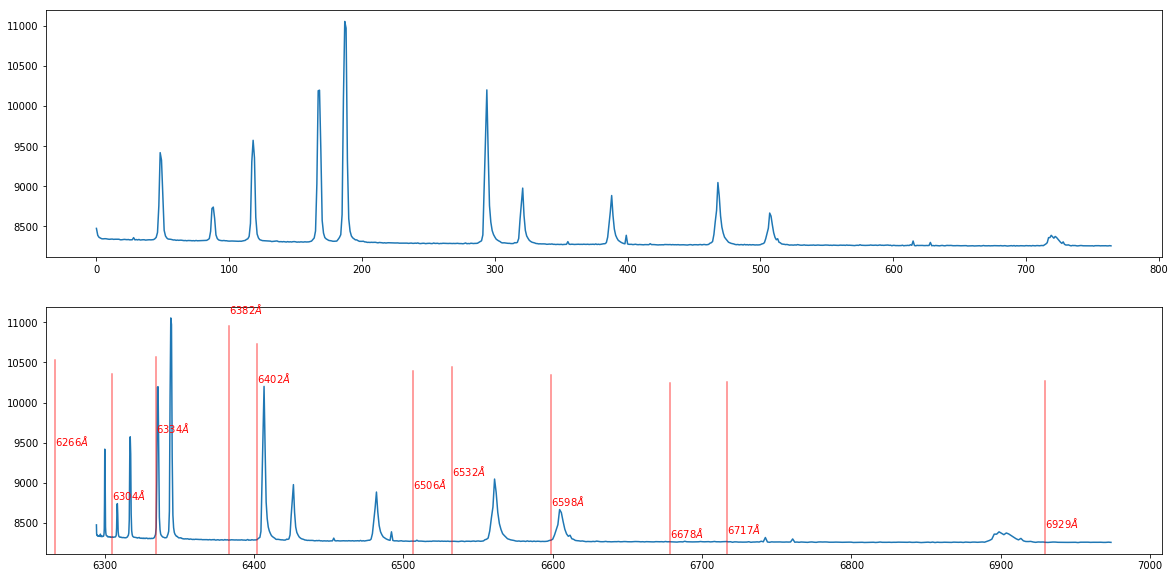

In [77]:
data1,hdr1=fits.getdata('../new_data/lamper_arclamp_spec_2min_new.00000001.FIT',0,header=True)
data2,hdr2=fits.getdata('../new_data/lamper_spec_2min_new.00000000.FIT',0,header=True)

cut50=data1[25:92,:]
#fits.writeto('../cutspec_star_arclamp.fits',cut50,hdr1)
print(cut50.shape)
avgcol_starlamp=np.mean(cut50,axis=0)
pix_pos=np.array([i for i in range(765)])
peak_pos=np.array(argrelextrema(avgcol_starlamp,np.greater,order=28)).flatten()

print(peak_pos)

wl=np.array([6266.49,6304.79,6334.43,6382.99,6402.25,6506.53,6532.88,6598.95,6678.28,6717.04,6929.47])
fit=np.polyfit(peak_pos, wl, 2)
print(fit)
#fit[0] = .98
LnRg=np.poly1d(fit)
exp_wl=LnRg(pix_pos)


for i in range(len(wl)):
    print()
    #print( (wl[i+1]-wl[i])/(peak_pos[i+1]-peak_pos[i]) )
    print(peak_pos[i], wl[i], LnRg(peak_pos[i]))
    print(LnRg(peak_pos[i])-wl[i])


fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(pix_pos,avgcol_starlamp)
ax2.plot(exp_wl,avgcol_starlamp)
for i in range(len(wl)):
    ax2.axvline(x=wl[i],ymin=0, ymax=(avgcol_starlamp[peak_pos[i]]+10)/12000,c='r',alpha=0.5)
    ax2.text(wl[i],avgcol_starlamp[peak_pos[i]]+50,str(int(wl[i]))+'$\AA$',color='r')


In [109]:
file=fits.open('../new_data/lamper_arclamp_spec_2min_new.00000001.FIT')

In [115]:
file.info()

Filename: ../new_data/lamper_arclamp_spec_2min_new.00000001.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (765, 255)   uint16   


In [116]:
file[0].data

array([[8351, 8312, 8343, ..., 8250, 8258, 8242],
       [8326, 8354, 8343, ..., 8248, 8249, 8255],
       [8321, 8324, 8326, ..., 8252, 8236, 8250],
       ...,
       [8769, 8594, 8380, ..., 8235, 8246, 8255],
       [8832, 8616, 8369, ..., 8250, 8242, 8243],
       [8807, 8642, 8391, ..., 8239, 8254, 8251]], dtype=uint16)

In [15]:
peak_pos

array([ 48,  88, 118, 187, 294, 388, 468, 507, 575, 615, 719])

In [16]:
wl

array([6266.49, 6304.79, 6334.43, 6382.99, 6402.25, 6506.53, 6532.88,
       6598.95, 6678.28, 6717.04, 6929.47])

(67, 765)
[48, 88, 118, 187, 294, 388, 468, 507, 719]
[  2.90477119e-05   9.65393172e-01   6.22028254e+03]

48 6266.49 6266.68834196
0.19834196227

88 6304.79 6305.46208839
0.672088386936

118 6334.43 6334.6033984
0.173398400419

187 6382.0 6401.82683635
19.8268363514

294 6506.53 6506.61890432
0.088904322055

388 6598.95 6599.22805319
0.278053185418

468 6678.28 6678.44869424
0.168694240014

507 6717.04 6717.20356719
0.163567185043

719 6929.47 6929.4167685
-0.0532314990833


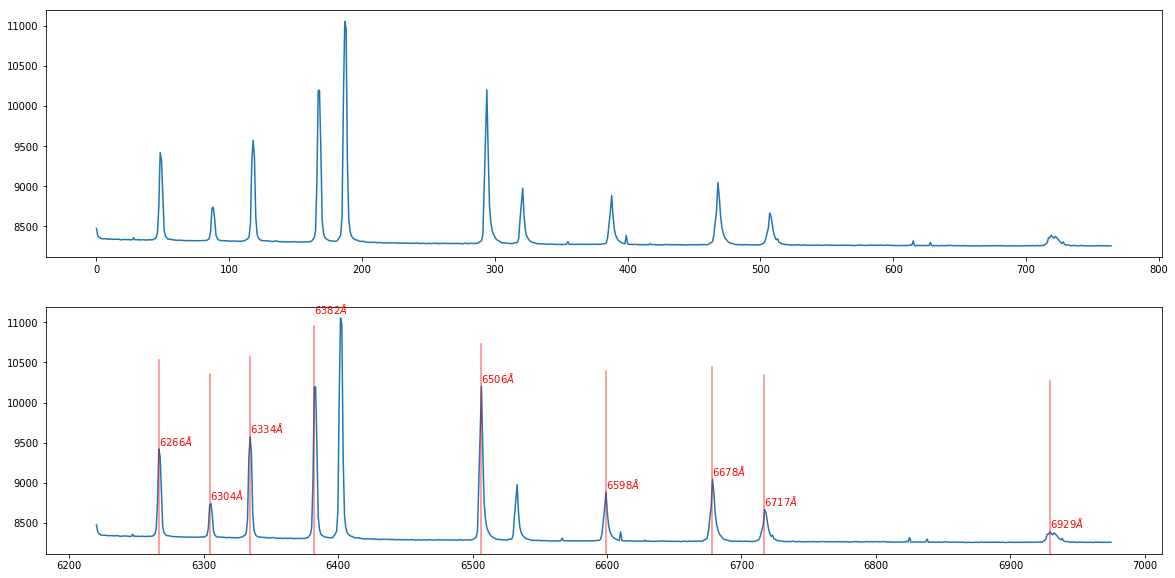

In [80]:
data1,hdr1=fits.getdata('../new_data/lamper_arclamp_spec_2min_new.00000001.FIT',0,header=True)
data2,hdr2=fits.getdata('../new_data/lamper_spec_2min_new.00000000.FIT',0,header=True)

cut50=data1[25:92,:]
#fits.writeto('../cutspec_star_arclamp.fits',cut50,hdr1)
print(cut50.shape)
avgcol_starlamp=np.mean(cut50,axis=0)
pix_pos=np.array([i for i in range(765)])
peak_pos=[48, 88, 118, 187, 294, 388, 468, 507, 719]

print(peak_pos)

wl=np.array([6266.49,6304.79,6334.43,6382,6506.53,6598.95,6678.28,6717.04,6929.47])
fit=np.polyfit([48, 187, 388, 719], [6266.49,6402.25,6598.95,6929.47], 2)
print(fit)
#fit[0] = .98
LnRg=np.poly1d(fit)
exp_wl=LnRg(pix_pos)


for i in range(len(wl)):
    print()
    #print( (wl[i+1]-wl[i])/(peak_pos[i+1]-peak_pos[i]) )
    print(peak_pos[i], wl[i], LnRg(peak_pos[i]))
    print(LnRg(peak_pos[i])-wl[i])


fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(pix_pos,avgcol_starlamp)
ax2.plot(exp_wl,avgcol_starlamp)
for i in range(len(wl)):
    ax2.axvline(x=wl[i],ymin=0, ymax=(avgcol_starlamp[peak_pos[i]]+10)/12000,c='r',alpha=0.5)
    ax2.text(wl[i],avgcol_starlamp[peak_pos[i]]+50,str(int(wl[i]))+'$\AA$',color='r')


In [74]:
peak_pos

[48, 88, 118, 187, 294, 388, 468, 507, 575, 719]